# Titanic Machine Learning from Disaster

Here we have to predict whether a passenger will survive the disaster or not.
Basically it falls under Binary Classification problem.

#### Link to Dataset:

https://www.kaggle.com/c/titanic/data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import mean , median , mode

pd.pandas.set_option('display.max_columns',None)

### Loading CSV

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape , test_df.shape

((891, 12), (418, 11))

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Types of Variables

In [9]:
continuous_features = [feature for feature in train_df.columns if train_df[feature].dtypes == 'O']
continuous_features , len(continuous_features)

(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 5)

In [10]:
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
numerical_features , len(numerical_features)

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 7)

***Numerical features are of two types:**
<ul>
    <li>Discrete</li>
    <li>Continuous</li>
</ul>

In [11]:
discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique()) < 25]
discrete_features , len(discrete_features)

(['Survived', 'Pclass', 'SibSp', 'Parch'], 4)

In [12]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features , len(continuous_features)

(['PassengerId', 'Age', 'Fare'], 3)

### Missing Value Analysis

In [13]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

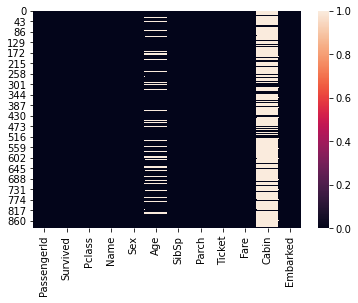

In [14]:
sns.heatmap(train_df.isna())

In [15]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

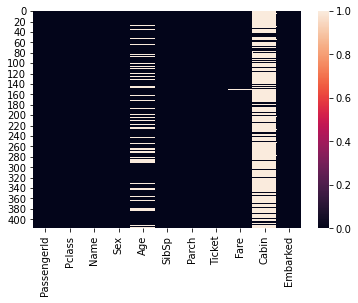

In [16]:
sns.heatmap(test_df.isna())

**Calculating percentages of missing values in each of the dataset:**

In [17]:
missing_features_train = [feature for feature in train_df.columns if train_df[feature].isna().sum() >= 1]
missing_features_train

['Age', 'Cabin', 'Embarked']

In [18]:
missing_features_test = [feature for feature in test_df.columns if test_df[feature].isna().sum() >= 1]
missing_features_test

['Age', 'Fare', 'Cabin']

In [19]:
for feature in missing_features_train:
    missing_perc = round((train_df[feature].isna().sum()/len(train_df))*100 , 2)
    print("{}: {}%".format(feature , missing_perc))

Age: 19.87%
Cabin: 77.1%
Embarked: 0.22%


In [20]:
for feature in missing_features_test:
    missing_perc = round((test_df[feature].isna().sum()/len(test_df))*100 , 2)
    print("{}: {}%".format(feature , missing_perc))

Age: 20.57%
Fare: 0.24%
Cabin: 78.23%


### Let's explore feature by feature

**Embarked:**

In [21]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked feature has 3 categories i.e, S, C and Q. S with the highest count , then C and lastly Q. <br>
So, we will impute missing values with S.

In [22]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [23]:
train_df.Embarked.isna().sum()

0

In [24]:
train_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

55% passengers of type C survived. <br>
38% passengers of type Q survived. <br>
33% passengers of type S survived. <br>

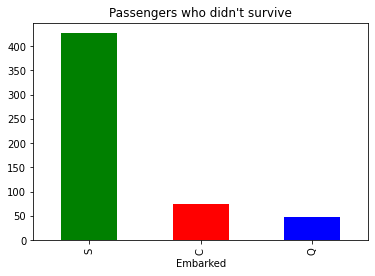

In [25]:
train_df.loc[train_df.Survived == 0 , 'Embarked'].value_counts().plot.bar(color = ['Green' , 'Red' , 'Blue'])
plt.title("Passengers who didn't survive")
plt.xlabel('Embarked')
plt.show()

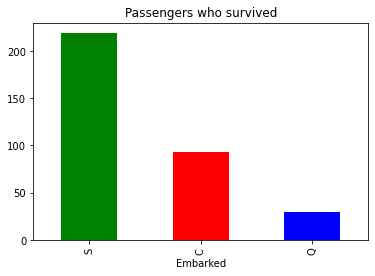

In [26]:
train_df.loc[train_df.Survived == 1 , 'Embarked'].value_counts().plot.bar(color = ['Green' , 'Red' , 'Blue'])
plt.title("Passengers who survived")
plt.xlabel('Embarked')
plt.show()

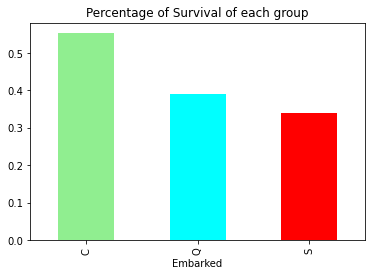

In [27]:
train_df.groupby('Embarked')['Survived'].mean().plot.bar(color = ['LightGreen' , 'Cyan' , 'Red'])
plt.title('Percentage of Survival of each group')
plt.show()

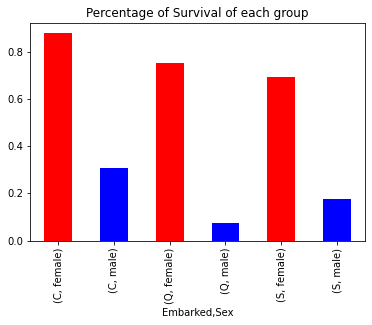

In [28]:
train_df.groupby(['Embarked','Sex'])['Survived'].mean().plot.bar(color = ['r','b'])
plt.title('Percentage of Survival of each group')
plt.show()

For Embarked , Females are more likely to Survive
Passengers who embarked from port C are having highest survival rate.
Although C is having highest survival rate , S is having more number of passengers. This is because 

**Pclass:**

In [29]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

62% of passengers survived from pclass 1. <br>
47% of passengers survived from pclass 2. <br>
24% of passengers survived from pclass 3. <br>

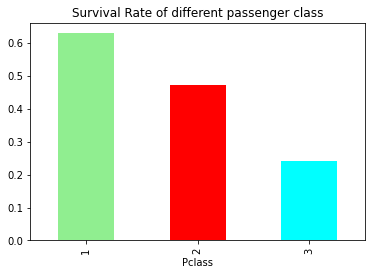

In [32]:
train_df.groupby('Pclass')['Survived'].mean().plot.bar(color = ['lightgreen' , 'red' , 'cyan'])
plt.title('Survival Rate of different passenger class')
plt.show()

Passengers belonging to class 1 is having highest survival rate.
As passenger class increases, survival rate decreases.

**Let's find relationship between Pclass , Embarked and Survived**

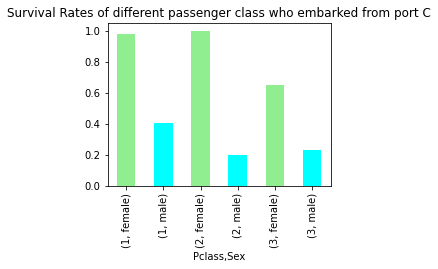

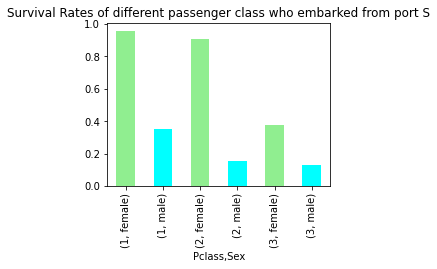

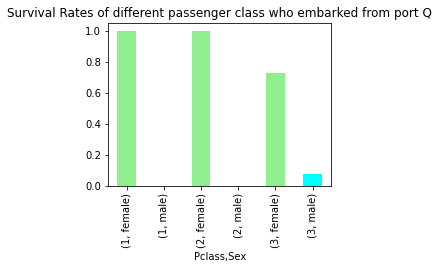

In [33]:
plt.figure(figsize = (4,3))
train_df.loc[train_df.Embarked == 'C',:].groupby(['Pclass','Sex'])['Survived'].mean().plot.bar(color = ['lightgreen','cyan'])
plt.title('Survival Rates of different passenger class who embarked from port C')
plt.show()

plt.figure(figsize = (4,3))
train_df.loc[train_df.Embarked == 'S',:].groupby(['Pclass','Sex'])['Survived'].mean().plot.bar(color = ['lightgreen','cyan'])
plt.title('Survival Rates of different passenger class who embarked from port S')
plt.show()

plt.figure(figsize = (4,3))
train_df.loc[train_df.Embarked == 'Q',:].groupby(['Pclass','Sex'])['Survived'].mean().plot.bar(color = ['lightgreen','cyan'])
plt.title('Survival Rates of different passenger class who embarked from port Q')
plt.show()

In [34]:
temp = pd.DataFrame()
temp['No. of Survived']=train_df.loc[train_df.Survived == 1,:].Pclass.value_counts()
temp['Total no. of Passengers'] = train_df.Pclass.value_counts()
temp['Survival Rate'] = temp['No. of Survived']/temp['Total no. of Passengers']
temp

,No. of Survived,Total no. of Passengers,Survival Rate
1,136,216,0.629630
3,119,491,0.242363
2,87,184,0.472826


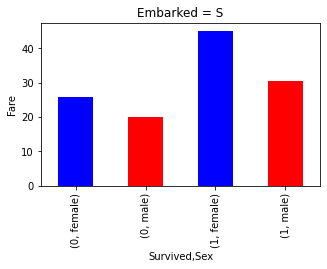

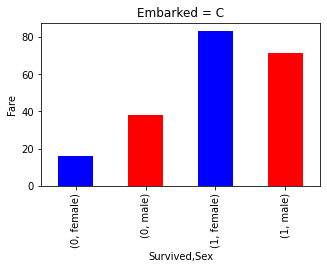

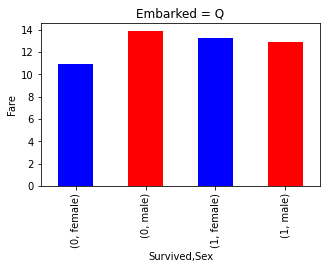

In [35]:
for i in train_df.Embarked.unique():
    plt.figure(figsize = (5,3))
    train_df.loc[train_df['Embarked'] == i,:].groupby(['Survived','Sex'])['Fare'].mean().plot.bar(color = ['blue','red'])
    title_name = 'Embarked = '+i
    plt.title(title_name)
    plt.ylabel('Fare')
    plt.show()

Passengers who paid higher Fare are more likely to survive.

In [36]:
#let's encode Embarked
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2,}).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


**Parch and Sib/Sp:** <br>
Parch is no. of parents/childrens <br>
SibSp is no. of siblings/spouse

In [37]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
train_df.groupby('Parch')['Survived'].mean().sort_values(ascending = False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64

In [39]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [40]:
train_df.groupby('SibSp')['Survived'].mean().sort_values(ascending = False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
8    0.000000
5    0.000000
Name: Survived, dtype: float64

Some of the categories of both Parch and SibSp have very less values. So, we will derive another feature 'Family Size' from these two features. This new feature will indicate total no. of family members aboard on titanic.

In [41]:
train_df['FamilySize'] = train_df['Parch']+train_df['SibSp']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0


**Family Size:**

In [42]:
train_df.FamilySize.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

In [43]:
train_df.groupby('FamilySize')['Survived'].mean().sort_values(ascending = False)

FamilySize
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
10    0.000000
7     0.000000
Name: Survived, dtype: float64

Family with 3 members is having highest survival rate. <br>
Chances of survival for whole family is very low, almost close to null if family size is greater than 7.

Still FamilySize is having some categories which have very less values and null correlation. So we need to make another feature out of this which will have less categories.

So, we will create a feature IsAlone. It will have 0 if the passenger is alone and 1 if the passenger is with famil members.

In [44]:
train_df['IsAlone'] = np.where(train_df['FamilySize'] >= 1 , 0 , 1)
train_df[['FamilySize','IsAlone']].tail(3)

,FamilySize,IsAlone
888,3,0
889,0,1
890,0,1


In [45]:
train_df.groupby('IsAlone')['Survived'].mean()

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [46]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1


**Sex:**

In [47]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

No. of male aboard is more than female.

In [48]:
train_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Females are more likely to survive. Their Survival rate is more than male.

In [49]:
train_df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

**Ticket:**

In [50]:
len(train_df.Ticket.unique())

681

In [51]:
len(train_df.Ticket)

891

Out of 891 , only 681 are unique. This may be because every family has different ticket number. <br> 
So this variable doesn't provide much information to us. And we may drop it later on.

**Name:**

The names are unique and contains typos. So the only thing we can extract from them is their Title.

In [52]:
dataset = train_df.copy()

In [53]:
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
dataset[['Name','Title']].head(10)

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [54]:
train_df = dataset.copy()

In [55]:
a = train_df.groupby('Title')['Age'].mean()

In [56]:
title_age_df = pd.DataFrame()
title_age_df['Title'] = a.index
title_age_df['AgeGrp'] = train_df.groupby('Title')['Age'].mean().values
title_age_df

,Title,AgeGrp
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


Title basically represents age group, So wherever Age is missing we can use the Title to fill the Nan values.

In [57]:
import math

In [58]:
title_age_df.loc[title_age_df.Title == 'Mr','AgeGrp'].values

array([32.36809045])

**Filling Missing Values in Age column**

In [59]:
for i in range(0,len(train_df)):
    if(math.isnan(train_df.loc[i,'Age'])):
        
        temp = train_df.loc[i,'Title']
        #getting age value from title dataset
        temp1 = (title_age_df.loc[title_age_df.Title == temp,'AgeGrp'].values).tolist()
        
        #filling nan in original dataset
        train_df.loc[i,'Age'] = temp1

In [60]:
train_df.Age.isna().sum()

0

In [61]:
for i in range(0,len(test_df)):
    if(math.isnan(test_df.loc[i,'Age'])):
        
        #getting age value from title dataset
        temp1 = (title_age_df.loc[title_age_df.Title == temp,'AgeGrp'].values).tolist()
        
        #filling nan in original dataset
        test_df.loc[i,'Age'] = temp1

In [62]:
test_df[['Age']].head(10)

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
5,14.0
6,30.0
7,26.0
8,18.0
9,21.0


In [63]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')

**Let's drop unnecessary features**

In [65]:
train_df.drop(['Cabin','Ticket','SibSp','Parch','Name'] , axis = 1 , inplace = True)

In [66]:
train_df['Sex'] = train_df['Sex'].map({'male':0 , 'female':1}).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,0,22.0,7.2500,0,1,0,Mr
1,2,1,1,1,38.0,71.2833,1,1,0,Mrs
2,3,1,3,1,26.0,7.9250,0,0,1,Miss
3,4,1,1,1,35.0,53.1000,0,1,0,Mrs
4,5,0,3,0,35.0,8.0500,0,0,1,Mr


**Things to do now:**

Convert Age and Fare into groups and encode them. <br>
Group rare categories of Title into single category and encode them all.

In [67]:
train_df.groupby('Title')['Survived'].mean().sort_values(ascending = False)

Title
Sir         1.000000
Lady        1.000000
Ms          1.000000
Countess    1.000000
Mme         1.000000
Mlle        1.000000
Mrs         0.792000
Miss        0.697802
Master      0.575000
Major       0.500000
Col         0.500000
Dr          0.428571
Mr          0.156673
Rev         0.000000
Jonkheer    0.000000
Don         0.000000
Capt        0.000000
Name: Survived, dtype: float64

In [68]:
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Capt          1
Ms            1
Mme           1
Jonkheer      1
Lady          1
Sir           1
Don           1
Name: Title, dtype: int64

**Reducing Categories in Title:**

In [69]:
train_df['Title'] = train_df['Title'].replace(['Ms','Mlle','Mme','Lady'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Dr','Rev',
                           'Major','Col' ,
                           'Capt' ,'Sir' ,
                           'Countess','Jonkheer',
                           'Don'],'Rare')
train_df['Title'].value_counts()

Mr        517
Miss      187
Mrs       125
Master     40
Rare       22
Name: Title, dtype: int64

In [70]:
train_df.groupby('Title')['Survived'].mean().sort_values(ascending = False)

Title
Mrs       0.792000
Miss      0.705882
Master    0.575000
Rare      0.318182
Mr        0.156673
Name: Survived, dtype: float64

**Making Age Groups:**

In [71]:
train_df['AgeBand'] = pd.cut(train_df['Age'] , 5)
train_df.AgeBand.value_counts()

(16.336, 32.252]    382
(32.252, 48.168]    325
(0.34, 16.336]      104
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeBand, dtype: int64

In [72]:
train_df.groupby('AgeBand')['Survived'].mean().sort_values(ascending = False)

AgeBand
(0.34, 16.336]      0.548077
(48.168, 64.084]    0.434783
(16.336, 32.252]    0.392670
(32.252, 48.168]    0.320000
(64.084, 80.0]      0.090909
Name: Survived, dtype: float64

**Making FareGroups:**

In [73]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df.FareBand.value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: FareBand, dtype: int64

In [74]:
train_df.groupby('FareBand')['Survived'].mean().sort_values(ascending = False)

FareBand
(31.0, 512.329]    0.581081
(14.454, 31.0]     0.454955
(7.91, 14.454]     0.303571
(-0.001, 7.91]     0.197309
Name: Survived, dtype: float64

In [75]:
train_df[['Age','AgeBand','Fare','FareBand']].head()

,Age,AgeBand,Fare,FareBand
0,22.0,"(16.336, 32.252]",7.2500,"(-0.001, 7.91]"
1,38.0,"(32.252, 48.168]",71.2833,"(31.0, 512.329]"
2,26.0,"(16.336, 32.252]",7.9250,"(7.91, 14.454]"
3,35.0,"(32.252, 48.168]",53.1000,"(31.0, 512.329]"
4,35.0,"(32.252, 48.168]",8.0500,"(7.91, 14.454]"


In [76]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [77]:
train_df['AgeBand'] = le.fit_transform(train_df['AgeBand'])
train_df['FareBand'] = le.fit_transform(train_df['FareBand'])
train_df['Title'] = le.fit_transform(train_df['Title'])

In [78]:
train_df[['Age','AgeBand','Fare','FareBand']].head()

,Age,AgeBand,Fare,FareBand
0,22.0,1,7.2500,0
1,38.0,2,71.2833,3
2,26.0,1,7.9250,1
3,35.0,2,53.1000,3
4,35.0,2,8.0500,1


In [79]:
train_df.drop(['Age','Fare'] , axis = 1 , inplace = True)

In [80]:
train_df.groupby('Pclass')['Survived'].mean().sort_values(ascending = False)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [81]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,AgeBand,FareBand
0,1,0,3,0,0,1,0,2,1,0
1,2,1,1,1,1,1,0,3,2,3
2,3,1,3,1,0,0,1,1,1,1
3,4,1,1,1,0,1,0,3,2,3
4,5,0,3,0,0,0,1,2,2,1


In [82]:
train_df.to_csv('processed_csv' , index = False)

## Modelling

In [94]:
x_train = train_df.drop('Survived' , axis = 1)
y_train = train_df['Survived']

In [97]:
x_test = pd.read_csv('processed_test.csv')
x_test_id = x_test['PassengerId']
x_test = x_test.drop('PassengerId' , axis = 1)
x_test.head()

,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,AgeBand,FareBand
0,3,0,2,0,1,2,2,0
1,3,1,0,1,0,3,3,0
2,2,0,2,0,1,2,4,3
3,3,0,0,0,1,2,1,3
4,3,1,0,2,0,3,1,3


In [96]:
x_train_id = x_train['PassengerId']
x_train = x_train.drop('PassengerId' , axis = 1)
x_train.head()

,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,AgeBand,FareBand
0,3,0,0,1,0,2,1,0
1,1,1,1,1,0,3,2,3
2,3,1,0,0,1,1,1,1
3,1,1,0,1,0,3,2,3
4,3,0,0,0,1,2,2,1


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [99]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
acc_Logistic = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [101]:
acc_Logistic

0.7991964589717397

In [102]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [103]:
final_results = pd.DataFrame()
final_results['PassengerId'] = x_test_id 
final_results['Survived'] = y_pred
final_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [104]:
final_results.to_csv('Output_results.csv' , index = False)